1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import random

The covariance matrix is
[[ 1.03690968  1.04766537  3.12148473]
 [ 1.04766537  9.80694582 11.90227657]
 [ 3.12148473 11.90227657 18.14524604]] 

The eigenvalues of the covariance matrix are
[ 2.69710934e+01 -6.42503635e-16  2.01800814e+00] 

And the eigenvectors are
[-0.12081806 -0.81649658  0.56456738] 

[-0.57063294 -0.40824829 -0.71253869] 

[-0.81226907  0.40824829  0.41659608] 

The eigenvalues of the covariance matrix obtained using SVD are
[2.69711185e+01 2.02130791e+00 2.15866751e-31] 

And the eigenvectors obtained using SVD are
[-0.12082458  0.56456599 -0.81649658] 

[-0.57062472 -0.71254527 -0.40824829] 

[-0.81227388  0.4165867   0.40824829] 

The vector of PVE for each principal component is 
 [9.30281520e-01 6.97184803e-02 7.44562555e-33]
x1 represents 93.02815196510824 percent of the variability, while x2 6.971848034891767 percent.


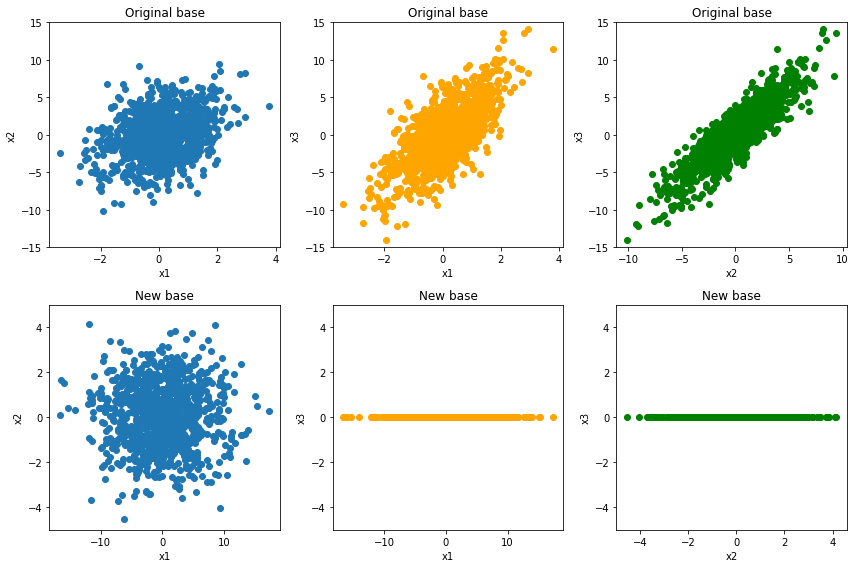

In [2]:
#Answer

#Dataset generation
N = 1000
x1 = np.random.normal(0., 1., N)
x2 = x1 + np.random.normal(0., 3., N)
x3 = 2 * x1 +x2

A = np.array([x1,x2,x3])


#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
covariance = np.cov(A) #Rowvar=False implies that each column represents a variable, while the rows contain observations.
print('The covariance matrix is')
print(covariance, '\n')

e_values, e_vectors = np.linalg.eig(covariance)
print('The eigenvalues of the covariance matrix are')
print(e_values, '\n')
print('And the eigenvectors are')
print(e_vectors[0,:], '\n')
print(e_vectors[1,:], '\n')
print(e_vectors[2,:],'\n')

#Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(A)
print('The eigenvalues of the covariance matrix obtained using SVD are')
print(spectrum**2/(N-1), '\n')
print('And the eigenvectors obtained using SVD are')
print(U[0,:], '\n')
print(U[1,:], '\n')
print(U[2,:], '\n')
#I noticed that the second and the third eigenvectors and eigenvalues were interchanged.

#What percent of the total dataset's variability is explained by the principal components?
eigen_values = spectrum**2/(N-1)
PVE = eigen_values/eigen_values.sum()   #The Proportion of Variance Explained (PVE)
print('The vector of PVE for each principal component is \n',PVE)
print('x1 represents',PVE[0]*100,'percent of the variability, while x2', PVE[1]*100,'percent.')
#It maskes sense that most of the variability is asociated with x1, the only fully independant variable.


#Redefine the data in the basis yielded by the PCA procedure
A_rot = np.dot(U.T,A)

#Plot the data points in the original and the new coordiantes as a set of scatter plots.
#Nota mental: Buscar algo mas eficiente. 
fig, axs = plt.subplots(2, 3,figsize=(12,8))

axs[0, 0].scatter(A[0,:],A[1,:])
axs[0, 0].set_ylim([-15,15])
axs[0, 0].set_title('Original base')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 1].scatter(A[0,:],A[2,:],color='orange')
axs[0, 1].set_ylim([-15,15])
axs[0, 1].set_title('Original base')
axs[0, 1].set_xlabel('x1')
axs[0, 1].set_ylabel('x3')

axs[0, 2].scatter(A[1,:],A[2,:],color='green')
axs[0, 2].set_ylim([-15,15])
axs[0, 2].set_title('Original base')
axs[0, 2].set_xlabel('x2')
axs[0, 2].set_ylabel('x3')

axs[1, 0].scatter(A_rot[0,:],A_rot[1,:])
axs[1, 0].set_ylim([-5,5])
axs[1, 0].set_title('New base')
axs[1, 0].set_xlabel('x1')
axs[1, 0].set_ylabel('x2')

axs[1, 1].scatter(A_rot[0,:],A_rot[2,:],color='orange')
axs[1, 1].set_ylim([-5,5])
axs[1, 1].set_title('New base')
axs[1, 1].set_xlabel('x1')
axs[1, 1].set_ylabel('x3')

axs[1, 2].scatter(A_rot[1,:],A_rot[2,:],color='green')
axs[1, 2].set_ylim([-5,5])
axs[1, 2].set_title('New base')
axs[1, 2].set_xlabel('x2')
axs[1, 2].set_ylabel('x3')
plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The percent of the total variability by component 

91.33174677919405
6.844857944447326
0.6117766777153816
0.45656783903099174
0.3480314800440849
0.15421889314346687
0.13995065854571018
0.06798482611959777
0.03269303384591376
0.005578702345821989
0.005264992480323496
0.001328173087333249
4.941339913558667e-31


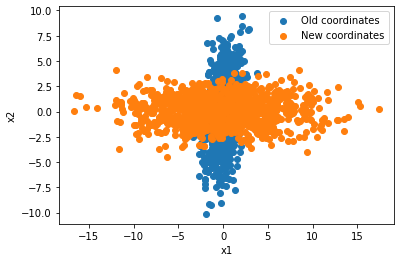

In [3]:
#Answer
A_noisy = np.zeros((13,N))
A_noisy[:3,:] = A

std = [random.randint(1,30)/50 for i in range(3,13)]
for i in range(3,13):
    A_noisy[i,:] = np.random.normal(0., std[i-3], N)
    

U, spectrum, Vt = la.svd(A_noisy)
eigen_values = spectrum**2/(N-1)

PVE = eigen_values/eigen_values.sum()   
print('The percent of the total variability by component \n')
for i in PVE:
    print(i*100)
#We can still see that the first and the seccond components are the ones that contribute the most, followed by the third.
#What I find somehow strange is that the order of magnitud of the third variable is comparable to the noisy ones (sometimes)


#PCA procedure
A_noisy_rot = np.dot(U.T,A_noisy)

plt.scatter(A_noisy[0,:],A_noisy[1,:], label='Old coordinates')
plt.scatter(A_noisy_rot[0,:],A_noisy_rot[1,:], label='New coordinates')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [4]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2020-12-01 15:53:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘/home/usuario/data/magic04.data.3’

magic04.data.3      100%[===================>]   1,41M  1,24MB/s    in 1,1s    

2020-12-01 15:53:50 (1,24 MB/s) - ‘/home/usuario/data/magic04.data.3’ saved [1477391/1477391]

--2020-12-01 15:53:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: ‘/home/usuario/data/magic04.names.3’

magic04.names